In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import math
from matplotlib.colors import ListedColormap
import os
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression
import re
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_arr = []
filepath_kernel = r'C:\Users\kpebe\OneDrive\Рабочий стол\Transistors 2020'

for root, dirs, files in os.walk(filepath_kernel):
    
    for file in files:
        
        if 'Results' in os.path.splitext(file)[0]:
            
            df = pd.read_csv(root + '\\' + file, engine = 'python', sep = '\t', index_col = None)
            data_arr.append(df)
            
data = pd.concat(data_arr, axis = 0, ignore_index = True)
pd.DataFrame.to_csv(data, path_or_buf = filepath_kernel + r'\All results.csv', sep = '\t', header = True, index = False)

In [3]:
data.dropna(inplace= True, how = 'any')
data.reset_index(inplace = True, drop = True)

In [4]:
data

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility
0,1st regime 120 s,First measurement,Operable,-1.0,140.0,5929686.0,1.000000e+12,168643.0,9.372
1,1st regime 120 s,First measurement,Operable,-1.0,160.0,2595946.0,1.000000e+12,385216.0,20.573
2,1st regime 120 s,First measurement,Operable,-1.0,180.0,2346911.0,1.000000e+12,426092.0,22.684
3,1st regime 120 s,First measurement,Operable,-1.0,60.0,14009428.0,1.000000e+12,71380.0,1.890
4,1st regime 120 s,First measurement,Operable,-1.0,140.0,5830768.0,1.000000e+12,171504.0,6.314
...,...,...,...,...,...,...,...,...,...
1177,5th regime 18 s,First measurement,Operable,1.0,120.0,175500176.0,1.085776e+10,62.0,0.209
1178,5th regime 18 s,First measurement,Operable,1.0,120.0,98259819.0,1.000000e+12,10177.0,0.583
1179,5th regime 18 s,First measurement,Operable,1.0,120.0,77544627.0,1.000000e+12,12896.0,0.709
1180,5th regime 18 s,First measurement,Operable,1.0,80.0,35855531.0,1.000000e+12,27890.0,0.583


In [5]:
arr1 = []
arr2 = []
data = data[data['Measurement'] == 'First measurement']

for item in data['Chip name']:
    
    arr1.append(str(item[0]))
        
        
data['$CO_{2}$ $concentration$'] = arr1

In [6]:
data

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility,$CO_{2}$ $concentration$
0,1st regime 120 s,First measurement,Operable,-1.0,140.0,5929686.0,1.000000e+12,168643.0,9.372,1
1,1st regime 120 s,First measurement,Operable,-1.0,160.0,2595946.0,1.000000e+12,385216.0,20.573,1
2,1st regime 120 s,First measurement,Operable,-1.0,180.0,2346911.0,1.000000e+12,426092.0,22.684,1
3,1st regime 120 s,First measurement,Operable,-1.0,60.0,14009428.0,1.000000e+12,71380.0,1.890,1
4,1st regime 120 s,First measurement,Operable,-1.0,140.0,5830768.0,1.000000e+12,171504.0,6.314,1
...,...,...,...,...,...,...,...,...,...,...
1177,5th regime 18 s,First measurement,Operable,1.0,120.0,175500176.0,1.085776e+10,62.0,0.209,5
1178,5th regime 18 s,First measurement,Operable,1.0,120.0,98259819.0,1.000000e+12,10177.0,0.583,5
1179,5th regime 18 s,First measurement,Operable,1.0,120.0,77544627.0,1.000000e+12,12896.0,0.709,5
1180,5th regime 18 s,First measurement,Operable,1.0,80.0,35855531.0,1.000000e+12,27890.0,0.583,5


In [5]:
arr1 = []
arr2 = []

data = data[data['Measurement'] == '1st measurement']
data = data[data['Bias'] == 0.3]

for item in data['Chip name']:
    
    if 'Pristine' in item:
        
        arr1.append('Pristine')
        arr2.append(float(item.split('_')[4].replace('MOhm', '')))
        
    else:
        
        arr1.append('N2O')
        arr2.append(float(item.split('_')[4].replace('MOhm', '')))
#     arr.append(item[0])
    
data['R'] = arr2
data['CNT type'] = arr1
        

In [7]:
data['R open'] = data['R open']/data['Lch']*150
data['R closed'] = data['R closed']/data['Lch']*150

In [8]:
data = data[data['Bias'] == 1]
data = data[data['$CO_{2}$ $concentration$'] != '5'][data['$CO_{2}$ $concentration$'] != '4'][data['$CO_{2}$ $concentration$'] != '3']
# for item in data['Lch']:
    
#     arr2.append(str(item))
    
# data['Lch'] = arr2

KeyError: 'Series'

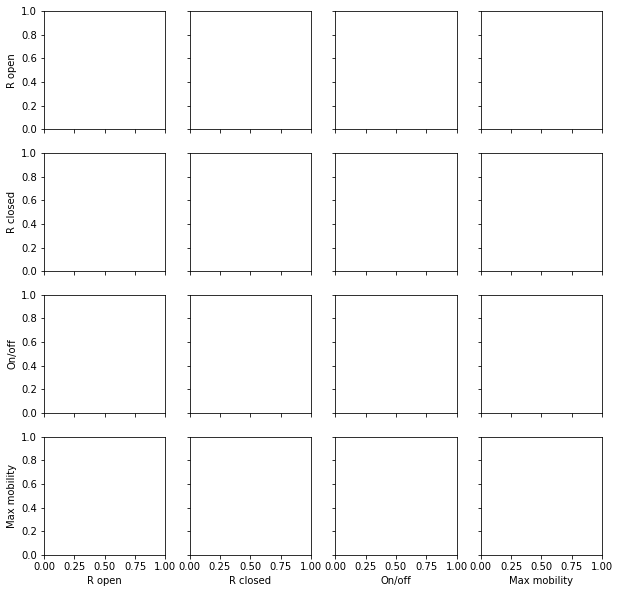

In [8]:
g = sns.pairplot(data, hue = 'Series', diag_kind = 'hist', palette = 'rainbow', vars = ['R open', 'R closed', 'On/off', 'Max mobility'],
                 plot_kws = {'size': 15, 'alpha' : 0.85}, diag_kws = {'alpha' : 0.4, 'log' : True, 'bins' : np.logspace(np.log10(1e-3),np.log10(1e12), 80)})
    
k = ['R open', 'R closed', 'On/off', 'Max mobility']

for i in range(0, g.axes.shape[0]):
    
    for j in range(0, g.axes.shape[1]):
        
        if i != j:
            
            g.axes[i,j].set_xscale('log')
            g.axes[i,j].set_yscale('log')
            
            g.axes[i,j].set_xlim([10**np.floor(math.log10(np.min(data[k[j]]))),
                                  10**np.ceil(math.log10(np.max(data[k[j]])))])
            g.axes[i,j].set_ylim([10**np.floor(math.log10(np.min(data[k[i]]))),
                                  10**np.ceil(math.log10(np.max(data[k[i]])))])
            
        else:
            
            g.axes[i,j].set_xscale('log')
            g.axes[i,j].set_xlim([10**np.floor(np.log10(np.min(data[k[j]]))),
                                  10**np.ceil(np.log10(np.max(data[k[j]])))])
            
plt.savefig('SuperPuper.png', dpi = 600, format = 'png')

NameError: name 'k' is not defined

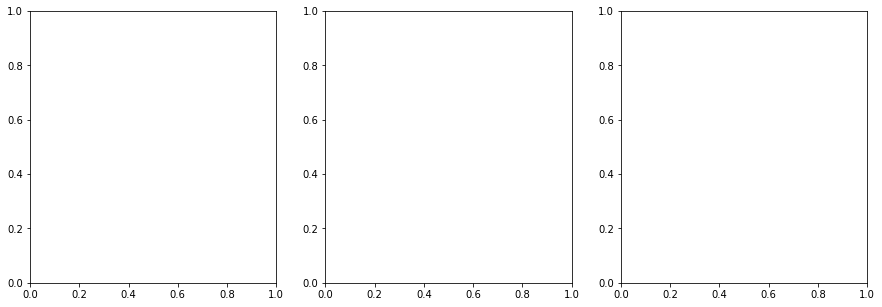

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ylabels = ['$R_{open}/sq$, $\Omega$', '$On/off$ $ratio$', '$Peak$ $mobility$, $cm^{2}V^{-1}s^{-1}$']

for i in range(3):

    sns.scatterplot(x = 'R open', y = k[i + 1], data = data[data['Series'] == '1'], hue = 'Lch', palette = 'rainbow', 
                    ax = ax[i], alpha = 0.8)
    
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].set_xlabel('$R_{open}/sq$, $\Omega$', fontsize = 14)
    ax[i].set_ylabel(ylabels[i], fontsize = 14)
    
#     ax[i].get_legend().remove()
    
plt.tight_layout(pad = 1)
# plt.savefig('Resistance scatter.png', format = 'png', dpi = 600, bbox_inches = 'tight')

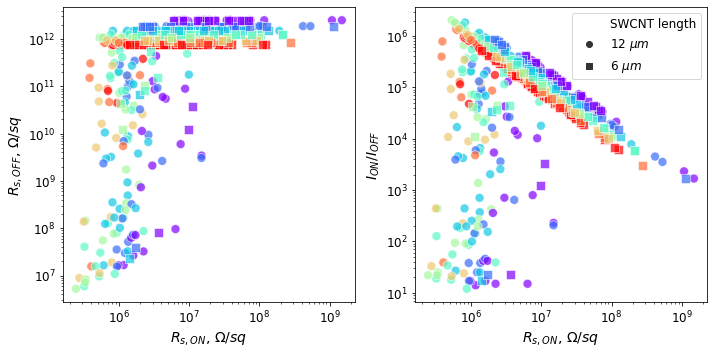

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
data['Lch'] = np.rint(data['Lch'])
k = ['R open', 'R closed', 'On/off', 'Max mobility']
data['SWCNT length'] = list(map({'1' : '12 $\mu$$m$', '2' :'6 $\mu$$m$'}.get, data['$CO_{2}$ $concentration$']))

ylabels = ['$R_{s, OFF}$, $\Omega$$/sq$', '$I_{ON}/I_{OFF}$', '$Peak$ $mobility$, $cm^{2}V^{-1}s^{-1}$']

for i in range(2):

    out = sns.scatterplot(x = 'R open', y = k[i + 1], data = data, hue = 'Lch', style = 'SWCNT length', palette = 'rainbow', 
                    ax = ax[i], markers = ['o', 's'], s = 80, alpha = 0.7)
    
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].set_xlabel('$R_{s, ON}$, $\Omega$$/sq$', fontsize = 14)
    ax[i].set_ylabel(ylabels[i], fontsize = 14)
    
ax[0].get_legend().remove()
# ax[2].get_legend().remove()
ax[1].legend(ax[i].get_legend_handles_labels()[0][5:],ax[i].get_legend_handles_labels()[1][5:], fontsize = 12)
    
plt.tight_layout(pad = 1)
plt.savefig('Resistance scatter regimes 1-2.png', format = 'png', dpi = 600, bbox_inches = 'tight')

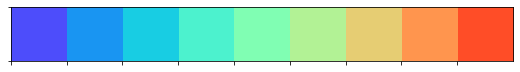

In [77]:
sns.palplot(sns.color_palette("rainbow", n_colors = 9))

In [11]:
data

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility,$CO_{2}$ $concentration$
0,1st regime 100 s,First measurement,Operable,1.0,160.0,3.620348e+06,3.657680e+09,1010.0,9.834,1
1,1st regime 100 s,First measurement,Operable,1.0,80.0,3.789839e+07,1.875000e+12,49474.0,1.450,1
2,1st regime 100 s,First measurement,Operable,1.0,180.0,8.301538e+07,8.333333e+11,10038.0,0.632,1
3,1st regime 100 s,First measurement,Operable,1.0,60.0,1.604621e+08,2.500000e+12,15580.0,0.401,1
4,1st regime 100 s,First measurement,Operable,1.0,80.0,3.792491e+07,1.875000e+12,49440.0,1.790,1
...,...,...,...,...,...,...,...,...,...,...
1139,2nd regime 195 s,First measurement,Operable,1.0,60.0,1.123802e+07,3.705900e+10,3298.0,4.765,2
1140,2nd regime 195 s,First measurement,Operable,1.0,80.0,2.712128e+06,1.875000e+12,691339.0,17.121,2
1141,2nd regime 195 s,First measurement,Operable,1.0,100.0,7.057994e+06,1.500000e+12,212525.0,5.640,2
1142,2nd regime 195 s,First measurement,Operable,1.0,120.0,2.846706e+06,5.555556e+11,195157.0,12.516,2


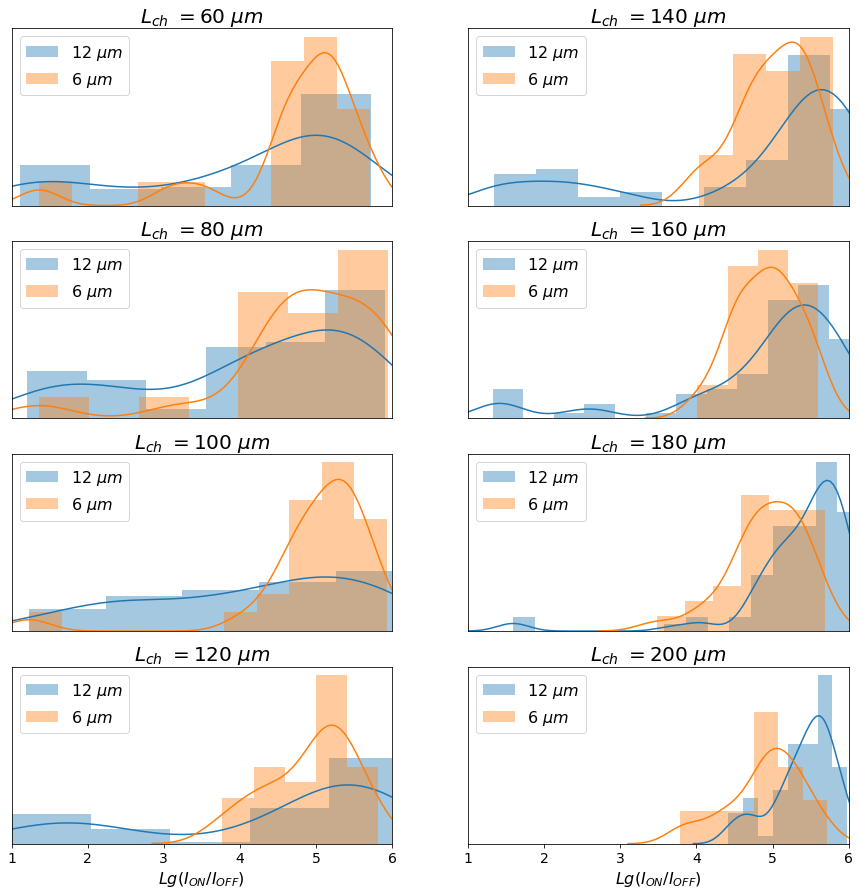

In [9]:
arr = [60,80,100,120,140,160,180,200]
fig, ax = plt.subplots(4, 2, figsize = (15, 15), squeeze = True)

for i in range(4):
    
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[i]]['On/off']), 
                 ax = ax[i][0], rug = False, hist = True, label = '12 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[i]]['On/off']), 
                 ax = ax[i][0], rug = False, hist = True, label = '6 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[4 + i]]['On/off']), 
                 ax = ax[i][1], rug = False, hist = True, label = '12 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[4 + i]]['On/off']), 
                 ax = ax[i][1], rug = False, hist = True, label = '6 $\mu$$m$')
    
    
    
    ax[i][0].set_xlim(left = 1, right = 6)
    ax[i][1].set_xlim(left = 1, right = 6)
    
    ax[i][0].legend(fontsize = 16)
    ax[i][1].legend(fontsize = 16)
    
#     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[i]]['On/off'], 
#                        data[data['Chip name'] == '2'][data['Lch'] == arr[i]]['On/off']))
    
#     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[4 + i]]['On/off'], 
#                        data[data['Chip name'] == '2'][data['Lch'] == arr[4 + i]]['On/off']))
    
    ax[i][0].yaxis.set_ticks_position('none')
    ax[i][1].yaxis.set_ticks_position('none') 
    ax[i][0].axes.get_yaxis().set_visible(False)
    ax[i][1].axes.get_yaxis().set_visible(False)
    ax[i][0].set_title('$L_{ch}$ $=$' + '{} $\mu$$m$'.format(arr[i]), fontsize = 20)
    ax[i][1].set_title('$L_{ch}$ $=$' + '{} $\mu$$m$'.format(arr[4 + i]), fontsize = 20)
    
    if i != 4 - 1:
        
        ax[i][0].xaxis.set_ticks_position('none')
        ax[i][1].xaxis.set_ticks_position('none') 
        ax[i][0].axes.get_xaxis().set_visible(False)
        ax[i][1].axes.get_xaxis().set_visible(False)
        
    else:
        
        ax[i][0].set_xlabel('$Lg($$I_{ON}/I_{OFF})$', fontsize = 16)
        ax[i][1].set_xlabel('$Lg($$I_{ON}/I_{OFF})$', fontsize = 16)
        
        ax[i][0].tick_params(axis='both', which='major', labelsize=14)
        ax[i][1].tick_params(axis='both', which='major', labelsize=14)
        
fig.savefig('Dist on-off.png', format = 'png', bbox_inches = 'tight', dpi = 600)

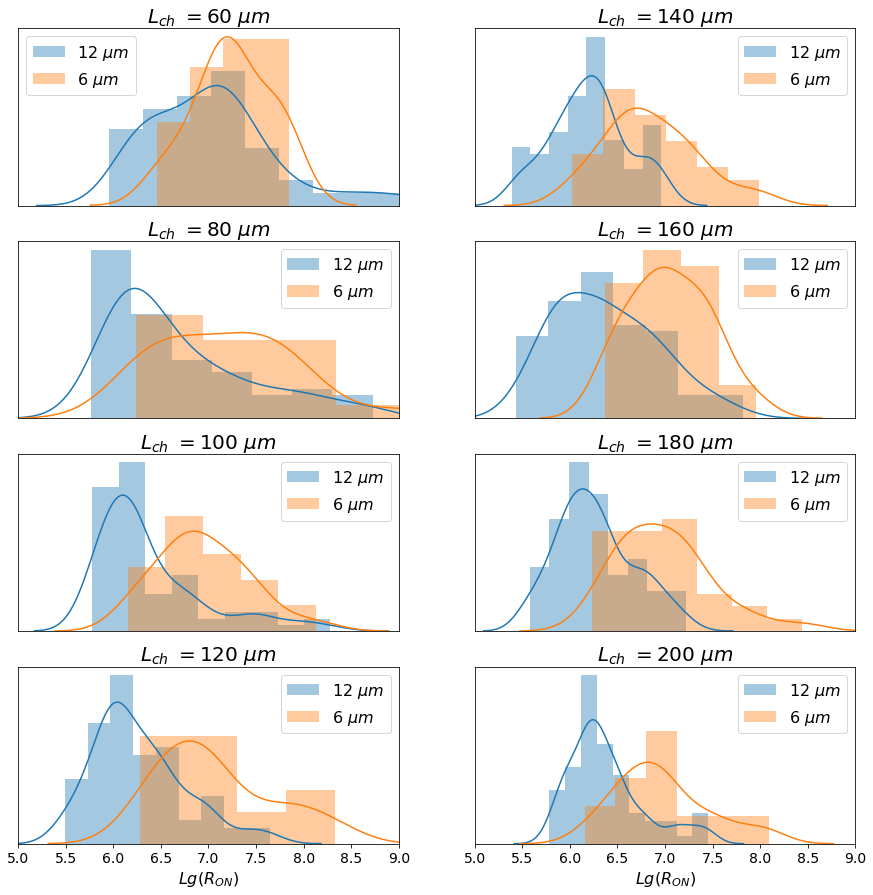

In [11]:
arr = [60,80,100,120,140,160,180,200]
fig, ax = plt.subplots(4, 2, figsize = (15, 15), squeeze = True)

for i in range(4):
    
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[i]]['R open']), 
                 ax = ax[i][0], rug = False, hist = True, label = '12 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[i]]['R open']), 
                 ax = ax[i][0], rug = False, hist = True, label = '6 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[4 + i]]['R open']), 
                 ax = ax[i][1], rug = False, hist = True, label = '12 $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[4 + i]]['R open']), 
                 ax = ax[i][1], rug = False, hist = True, label = '6 $\mu$$m$')
    
    
    
    ax[i][0].set_xlim(left = 5, right = 9)
    ax[i][1].set_xlim(left = 5, right = 9)
    
    ax[i][0].legend(fontsize = 16)
    ax[i][1].legend(fontsize = 16)
    
#     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[i]]['On/off'], 
#                        data[data['Chip name'] == '2'][data['Lch'] == arr[i]]['On/off']))
    
#     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[4 + i]]['On/off'], 
#                        data[data['Chip name'] == '2'][data['Lch'] == arr[4 + i]]['On/off']))
    
    ax[i][0].yaxis.set_ticks_position('none')
    ax[i][1].yaxis.set_ticks_position('none') 
    ax[i][0].axes.get_yaxis().set_visible(False)
    ax[i][1].axes.get_yaxis().set_visible(False)
    ax[i][0].set_title('$L_{ch}$ $=$' + '{} $\mu$$m$'.format(arr[i]), fontsize = 20)
    ax[i][1].set_title('$L_{ch}$ $=$' + '{} $\mu$$m$'.format(arr[4 + i]), fontsize = 20)
    
    if i != 4 - 1:
        
        ax[i][0].xaxis.set_ticks_position('none')
        ax[i][1].xaxis.set_ticks_position('none') 
        ax[i][0].axes.get_xaxis().set_visible(False)
        ax[i][1].axes.get_xaxis().set_visible(False)
        
    else:
        
        ax[i][0].set_xlabel('$Lg($$R_{ON})$', fontsize = 16)
        ax[i][1].set_xlabel('$Lg($$R_{ON})$', fontsize = 16)
        
        ax[i][0].tick_params(axis='both', which='major', labelsize=14)
        ax[i][1].tick_params(axis='both', which='major', labelsize=14)
        
fig.savefig('Dist Ropen.png', format = 'png', bbox_inches = 'tight', dpi = 600)

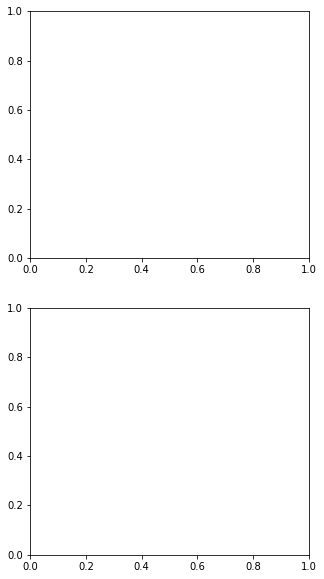

In [14]:
arr = [120,140,160,180,200]
fig, ax = plt.subplots(2, 1, figsize = (5, 10), squeeze = True)

for i in range(len(arr)):
    
    fig, ax = plt.subplots(2, 1, figsize = (5, 10), squeeze = True)
    
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[i]]['R open']), 
                 ax = ax[0], rug = False, hist = True, label = '$12$ $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[i]]['R open']), 
                 ax = ax[0], rug = False, hist = True, label = '$6$ $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '12 $\mu$$m$'][data['Lch'] == arr[i]]['On/off']), 
                 ax = ax[1], rug = False, hist = True, label = '$12$ $\mu$$m$')
    sns.distplot(np.log10(data[data['SWCNT length'] == '6 $\mu$$m$'][data['Lch'] == arr[i]]['On/off']), 
                 ax = ax[1], rug = False, hist = True, label = '$6$ $\mu$$m$')

    ax[0].set_xlim(left = 5, right = 9)
    ax[1].set_xlim(left = 1, right = 7)

    ax[0].legend(fontsize = 14)

    #     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[i]]['R open'], 
    #                        data[data['Chip name'] == '2'][data['Lch'] == arr[i]]['R open']))
    #     print(stats.mannwhitneyu(data[data['Chip name'] == '1'][data['Lch'] == arr[4 + i]]['R open'], 
    #                        data[data['Chip name'] == '2'][data['Lch'] == arr[4 + i]]['R open']))

    ax[0].yaxis.set_ticks_position('none')
    ax[1].yaxis.set_ticks_position('none') 
    ax[0].axes.get_yaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)
    ax[0].set_title('$L_{ch}$ $=$' + '{} $\mu$$m$'.format(arr[i]), fontsize = 24)
    #     ax[i][1].set_title('{} um'.format(arr[4 + i]), fontsize = 16)

    #     if i != 4 - 1:

    #         ax[i][0].xaxis.set_ticks_position('none')
    #         ax[i][1].xaxis.set_ticks_position('none') 
    #         ax[i][0].axes.get_xaxis().set_visible(False)
    #         ax[i][1].axes.get_xaxis().set_visible(False)

    #     else:

    ax[1].set_xlabel('$Lg($$I_{ON}/I_{OFF})$', fontsize = 20)
    ax[0].set_xlabel('$Lg($$R_{s, ON})$', fontsize = 20)

    ax[0].tick_params(axis='both', which='major', labelsize=16)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    
    plt.tight_layout(pad = 1)

    fig.savefig('Dist {}.png'.format(arr[i]), format = 'png', bbox_inches = 'tight', dpi = 600)
    
    plt.close(fig)

In [11]:
data

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility,$CO_{2}$ $concentration$,SWCNT length
52,1st regime 120 s,First measurement,Operable,1.0,140.0,9.033282e+06,1.071429e+12,118609.0,4.509,1,12 $\mu$$m$
53,1st regime 120 s,First measurement,Operable,1.0,160.0,2.295172e+06,9.375000e+11,408466.0,19.932,1,12 $\mu$$m$
54,1st regime 120 s,First measurement,Operable,1.0,180.0,1.954562e+06,8.333333e+11,426353.0,25.986,1,12 $\mu$$m$
55,1st regime 120 s,First measurement,Operable,1.0,60.0,3.802258e+07,2.500000e+12,65750.0,1.428,1,12 $\mu$$m$
56,1st regime 120 s,First measurement,Operable,1.0,140.0,6.611635e+06,1.071429e+12,162052.0,4.603,1,12 $\mu$$m$
...,...,...,...,...,...,...,...,...,...,...,...
1075,2nd regime 195 s,First measurement,Operable,1.0,60.0,1.123802e+07,3.705900e+10,3298.0,4.765,2,6 $\mu$$m$
1076,2nd regime 195 s,First measurement,Operable,1.0,80.0,2.712128e+06,1.875000e+12,691339.0,17.121,2,6 $\mu$$m$
1077,2nd regime 195 s,First measurement,Operable,1.0,100.0,7.057994e+06,1.500000e+12,212525.0,5.640,2,6 $\mu$$m$
1078,2nd regime 195 s,First measurement,Operable,1.0,120.0,2.846706e+06,5.555556e+11,195157.0,12.516,2,6 $\mu$$m$


In [108]:
data_mds = mds.fit_transform(df)
data_tsne = tsne.fit_transform(df)

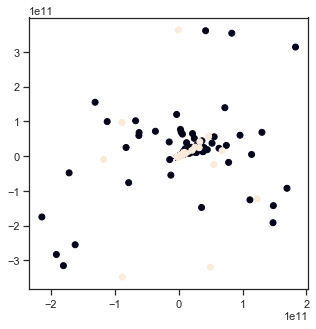

In [109]:
fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(data_mds[:, 0], data_mds[:, 1], c = labels)

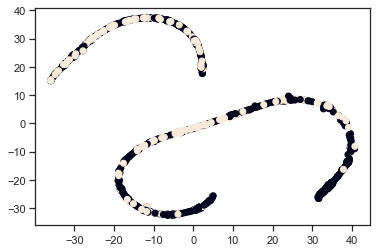

In [110]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = labels)

In [23]:
filepath_kernel = r'C:\Users\kpebe\OneDrive\Рабочий стол\Transistor measurements'
data = pd.read_csv(filepath_kernel + r'\All results.csv', sep = ';')

In [320]:
data

,Chip name,Measurement,Status,Bias,Lch,R open,R closed,On/off,Max mobility
0,1st regime 100 s,First measurement,Operable,1.0,160.0,3861705.0,3.901525e+09,1010.0,9.834
1,1st regime 100 s,First measurement,Operable,1.0,80.0,20212474.0,1.000000e+12,49474.0,1.450
2,1st regime 100 s,First measurement,Operable,1.0,180.0,99618461.0,1.000000e+12,10038.0,0.632
3,1st regime 100 s,First measurement,Operable,1.0,60.0,64184852.0,1.000000e+12,15580.0,0.401
4,1st regime 100 s,First measurement,Operable,1.0,80.0,20226619.0,1.000000e+12,49440.0,1.790
...,...,...,...,...,...,...,...,...,...
1241,5th regime 18 s,First measurement,Operable,1.0,120.0,175500176.0,1.085776e+10,62.0,0.209
1242,5th regime 18 s,First measurement,Operable,1.0,120.0,98259819.0,1.000000e+12,10177.0,0.583
1243,5th regime 18 s,First measurement,Operable,1.0,120.0,77544627.0,1.000000e+12,12896.0,0.709
1244,5th regime 18 s,First measurement,Operable,1.0,80.0,35855531.0,1.000000e+12,27890.0,0.583


In [34]:
data.query('`Chip name` != "Canatu chip 2"', inplace = True)
data.query('`Chip name` != "Canatu chip 1"', inplace = True)
data.dropna(how = 'any', inplace = True)

In [35]:
arr = []
for item in data['Chip name']:
    k = str.split(item, '_')
    arr.append(k)

In [47]:
time_arr = []
date_arr = []
for item in arr:
    date_arr.append(item[0])
    for param in item:
        if 'sec' in param:
            time_arr.append(int(param.replace('sec','')))

In [48]:
data['Time'] = time_arr
data['Date'] = date_arr

In [41]:
data.query('Bias == 0.3', inplace = True)

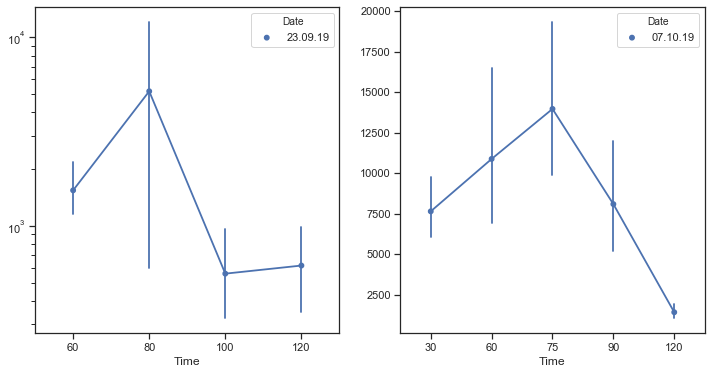

In [95]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.pointplot(x = data.query('Date == "23.09.19"')['Time'], y = data.query('Date == "23.09.19"')['R open']/data.query('Date == "23.09.19"')['Lch'], data = data.query('Date == "23.09.19"'), hue = 'Date', ax = ax[0])
ax[0].axes.set_yscale('log')
sns.pointplot(x = data.query('Date == "07.10.19"')['Time'], y = data.query('Date == "07.10.19"')['R open']/data.query('Date == "07.10.19"')['Lch'], data = data.query('Date == "07.10.19"'), hue = 'Date', ax = ax[1])
ax[0].axes.set_yscale('log')

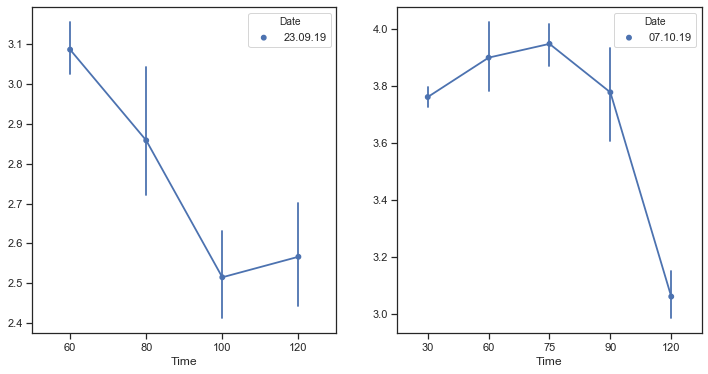

In [96]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.pointplot(x = data.query('Date == "23.09.19"')['Time'], y = np.log10(data.query('Date == "23.09.19"')['R open']/data.query('Date == "23.09.19"')['Lch']), data = data.query('Date == "23.09.19"'), hue = 'Date', ax = ax[0])
sns.pointplot(x = data.query('Date == "07.10.19"')['Time'], y = np.log10(data.query('Date == "07.10.19"')['R open']/data.query('Date == "07.10.19"')['Lch']), data = data.query('Date == "07.10.19"'), hue = 'Date', ax = ax[1])

In [64]:
np.array(data['Time'])

array([ 120,  120,  120,  120,  120,  120,  120,  120,  120,  120,  120,
        120,  120,  120,  120,  120,  120,  120,  120,  120,  120,  120,
        120,  120,  120,  120,  120,  120,  120,  120,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   30,   30,   30,   30,
         30,   30,   30,   30,   30,   30,   30,   

In [83]:
data['Time'].unique()

array([ 120,   30,   60,   75,   90,  300,  420,  600,  900,  100,   80,
       1200], dtype=int64)

AttributeError: 'Rectangle' object has no property 'n_bins'

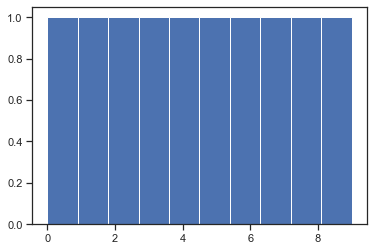

In [309]:
x = np.arange(0,10,1)
plt.hist(x, bins(1,))

(array([595.,   0., 136.,   3., 128.,   0.,   0.,  45.,   0.,  13.]),
 array([  30.,  147.,  264.,  381.,  498.,  615.,  732.,  849.,  966.,
        1083., 1200.]),
 <a list of 10 Patch objects>)

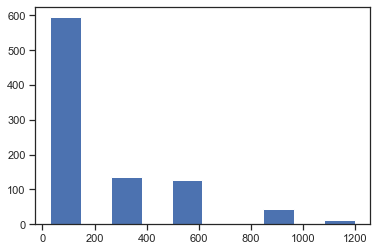

In [139]:
plt.hist(list(data['Time'].dropna()))

In [50]:
dir(ax[0].xaxis)

['OFFSETTEXTPAD',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_axes',
 '_clipon',
 '_clippath',
 '_contains',
 '_copy_tick_props',
 '_get_clipping_extent_bbox',
 '_get_label',
 '_get_offset_text',
 '_get_tick',
 '_get_tick_bboxes',
 '_get_tick_boxes_siblings',
 '_get_ticks_position',
 '_gid',
 '_gridOnMajor',
 '_gridOnMinor',
 '_in_layout',
 '_label',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_remove_overlapping_locs',
 '_scale',
 '_set_artist_props',
 '_se

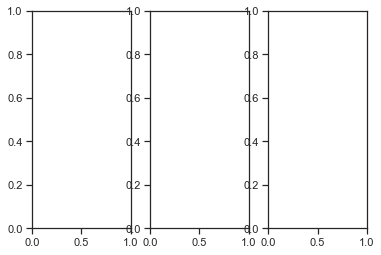

In [49]:
fig, ax = plt.subplots(1,3)

In [56]:
ax[0].xaxis._set_scale()?

SyntaxError: invalid syntax (<ipython-input-56-8c983748350f>, line 1)

In [ ]:
ax[0].xaxis._set_scale

In [16]:
np.rint(np.ndarray.flatten(length_array*1e4))

array([ 90., 150., 210., 270., 330.,  90., 150., 210., 270., 330.,  90.,
       150., 210., 270., 330.,  90., 150., 210., 270., 330.,  90., 150.,
       210., 270., 330.,  90., 150., 210., 270., 330.,  90., 150., 210.,
       270., 330.,  90., 150., 210., 270., 330.,  60., 120., 180., 240.,
       300.,  60., 120., 180., 240., 300.,  60., 120., 180., 240., 300.,
        60., 120., 180., 240., 300.,  60., 120., 180., 240., 300.,  60.,
       120., 180., 240., 300.,  60., 120., 180., 240., 300.,  60., 120.,
       180., 240., 300.])

In [1]:
6/1e6/8*1e13

7500000.0

In [37]:
df = pd.read_csv(r'C:\Users\kpebe\OneDrive\Рабочий стол\Transistor measurements old\25.11.19_N2O(30%, 600C)_1.4lpm_300sec_70MOhm\1st measurement\data\fet_10_1.csv', engine = 'python', sep = '\t', header = None)

In [39]:
df.shape

(1608, 6)

In [100]:
g?

In [142]:
len(ax)

8

In [88]:
sns.scatterplot?